# Decentmon data preparation

In [1]:
import pandas as pd

from decmon.constants import *
from decmon.df_utils import *
from decmon.filter import *
from decmon.plotter import *

Datasets: 8. Strategies: 3. Single dataset Formulae:3073
Datasets: 8. Strategies: 3. Single dataset Formulae:4221
Datasets: 8. Strategies: 3. Single dataset Formulae:5111
Datasets: 8. Strategies: 3. Single dataset Formulae:5072


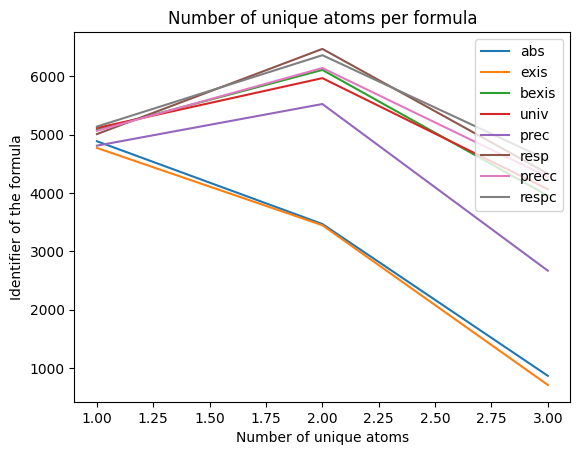

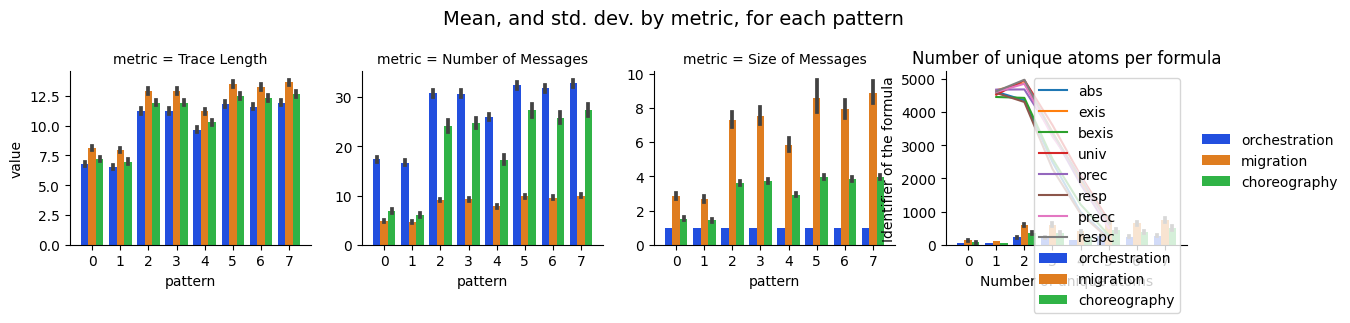

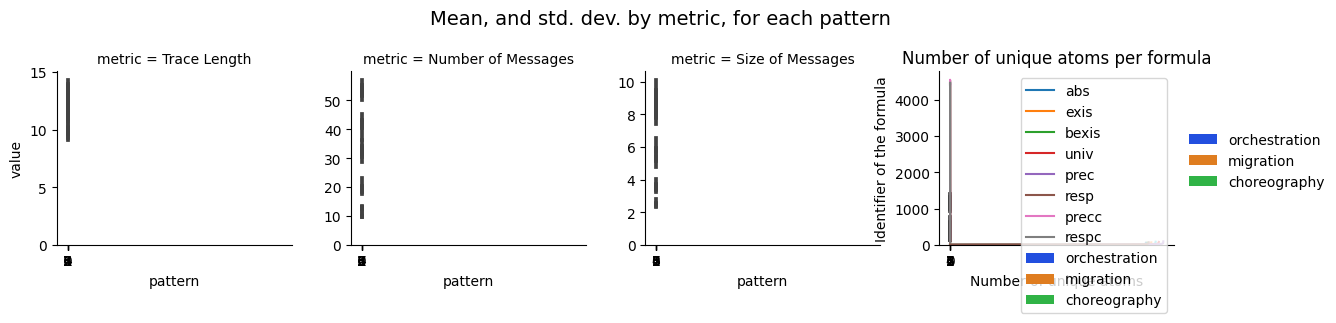

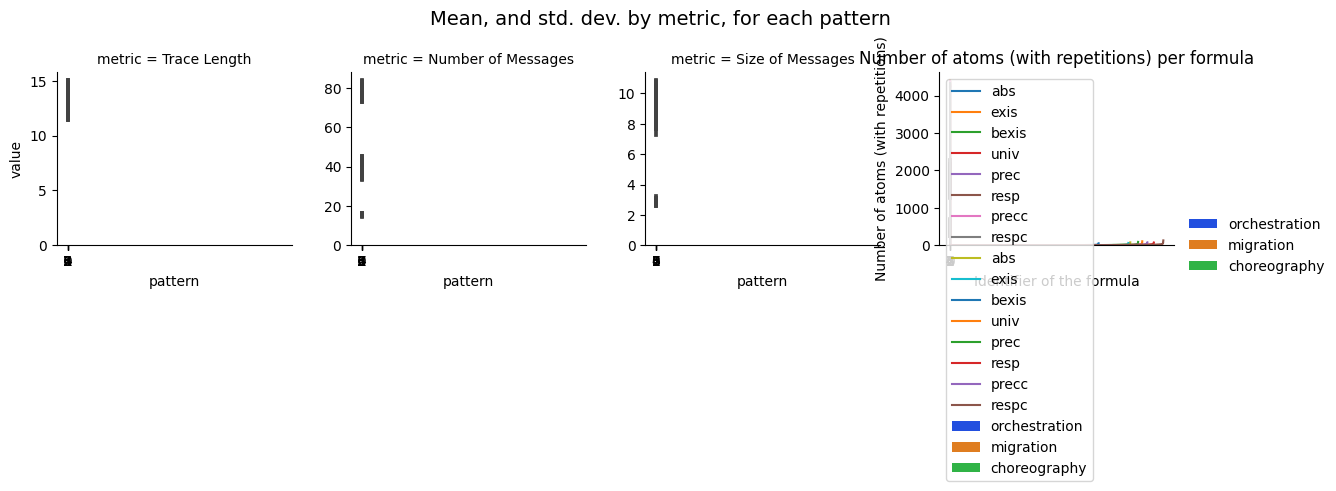

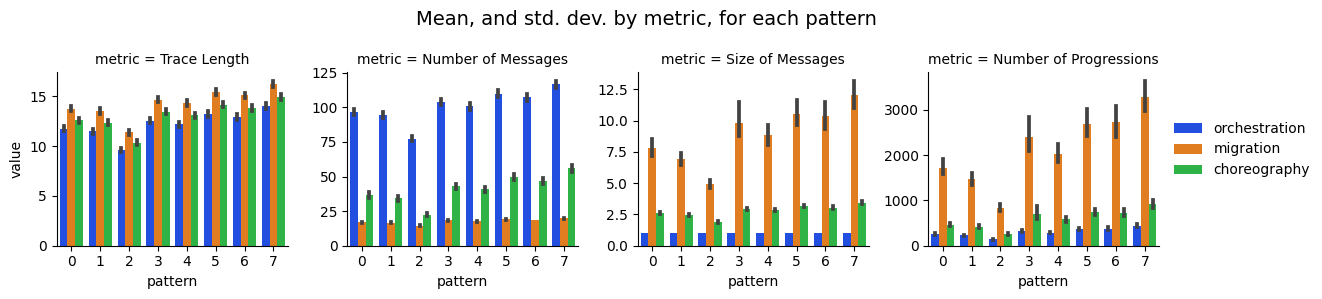

In [2]:
# noinspection PyUnresolvedReferences
from ipynb.fs.full.full_data_3 import full_scale_df_3
# noinspection PyUnresolvedReferences
from ipynb.fs.full.full_data_5 import full_scale_df_5
# noinspection PyUnresolvedReferences
from ipynb.fs.full.full_data_7 import full_scale_df_7
# noinspection PyUnresolvedReferences
from ipynb.fs.full.full_data_9 import full_scale_df_9

In [3]:
# FILENAME = "sample_log.txt"
FILENAME = "2022-09-07_12-06-13_output.log"

In [4]:
# path = f"{INPUT_DIR}/{FILENAME}"
#
# df = load_simulation_data(path)

frames = [full_scale_df_3, full_scale_df_5, full_scale_df_7, full_scale_df_9]
df = pd.concat(frames)
df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,0,...,445,446,447,448,449,450,451,452,453,454
0,0,1,3,6,1.00,12,"Until (Var ""c"", Var ""a"")",{ |b|c} ; { |b|c} ; { |b| } ; { | | } ; {a| |...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | | } ; {a|b|c} ; { |b| } ; {a|b| } ; {a| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,3,1.00,8,"Until (Var ""a"", Var ""c"")",{a| | } ; { |b|c} ; {a|b|c} ; { | | } ; {a|b|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,3,1.00,4,"Glob (Var ""c"")",{ |b|c} ; {a|b| } ; {a| |c} ; {a| |c} ; {a| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,3,1.00,4,"Glob (Var ""a"")",{a| | } ; { | |c} ; {a|b|c} ; { |b| } ; { |b|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18001,5997,6,22,227,14.61,2709,"And (Or (Glob (Or (Or (And (Glob (Neg (Var ""g...",{a|b|c|d| | |g| |i} ; { |b|c| | |f| |h| } ; {...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18002,5998,6,20,186,13.12,1709,"Until (Next (Until (Var ""f"", And (Or (Neg (Va...",{ | | |d| |f|g| | } ; {a|b| |d| | | |h|i} ; {...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18003,5999,6,21,59,3.98,1249,"And (Glob (Until (Ev (Var ""f""), Glob (Next (V...",{a|b| |d|e| |g| |i} ; { |b| | | | |g|h|i} ; {...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18004,6000,7,56,380,10.52,2663,"Or (Ev (And (Neg (Var ""i""), And (Or (And (And...",{ | | | | |f| | | } ; {a| | |d|e|f|g|h| } ; {...,choreography,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
strategies_ddf = split_by_dictionary(df, STRATEGIES)

print(f"Strategies: {len(strategies_ddf)}. Formulae:{len(strategies_ddf[0])}")
strategies_df = pd.concat(strategies_ddf, ignore_index=True)
strategies_df

Strategies: 3. Formulae:477330


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,1,3,6,1.00,12,"Until (Var ""c"", Var ""a"")",{ |b|c} ; { |b|c} ; { |b| } ; { | | } ; {a| |...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | | } ; {a|b|c} ; { |b| } ; {a|b| } ; {a| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,3,1.00,8,"Until (Var ""a"", Var ""c"")",{a| | } ; { |b|c} ; {a|b|c} ; { | | } ; {a|b|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,3,1.00,4,"Glob (Var ""c"")",{ |b|c} ; {a|b| } ; {a| |c} ; {a| |c} ; {a| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,3,1.00,4,"Glob (Var ""a"")",{a| | } ; { | |c} ; {a|b|c} ; { |b| } ; { |b|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431985,5997,6,22,227,14.61,2709,"And (Or (Glob (Or (Or (And (Glob (Neg (Var ""g...",{a|b|c|d| | |g| |i} ; { |b|c| | |f| |h| } ; {...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431986,5998,6,20,186,13.12,1709,"Until (Next (Until (Var ""f"", And (Or (Neg (Va...",{ | | |d| |f|g| | } ; {a|b| |d| | | |h|i} ; {...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431987,5999,6,21,59,3.98,1249,"And (Glob (Until (Ev (Var ""f""), Glob (Next (V...",{a|b| |d|e| |g| |i} ; { |b| | | | |g|h|i} ; {...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431988,6000,7,56,380,10.52,2663,"Or (Ev (And (Neg (Var ""i""), And (Or (And (And...",{ | | | | |f| | | } ; {a| | |d|e|f|g|h| } ; {...,choreography,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
merged_metrics = extract_metrics(strategies_df)

(trace_length, num_mess, size_mess, nb_progressions) = merged_metrics

merged_metrics.max()

formula_id             6001
strategy      orchestration
value              822925.0
metric            trace_len
dtype: object

## Formula Encoding

In [7]:
f_ops = extract_ops(strategies_df)
f_ops

,0,1,2,3,4,5,6,7,8,9,...,445,446,447,448,449,450,451,452,453,454
0,10,-3,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,-3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,-1,-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,-3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431985,4,5,13,5.0,5.0,4.0,13.0,6.0,-7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431986,10,11,10,-6.0,4.0,5.0,6.0,-2.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431987,4,13,10,12.0,-6.0,0.0,13.0,11.0,-3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431988,5,12,4,6.0,-9.0,0.0,4.0,5.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting

In [8]:
# to_plot = strategies_df.drop(['formula_id', 'x'], axis=1)
# plot_boxplot(to_plot)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
grid_plot = plot_grid_barplots(merged_metrics, grid_cell_field= 'metric',
          y_axis = 'value', x_axis = 'strategy',
          order = ['orchestration', 'migration', 'choreography'])

grid_plot.savefig("output/out.png")

In [ ]:
ndf = merged_metrics.copy()
ndf['strategy'] = ndf['strategy'].str.replace("^cent_", "1", regex=True)
ndf['strategy'] = ndf['strategy'].str.replace("^decent_", "2", regex=True)
ndf['strategy'] = ndf['strategy'].str.replace("^odecent_", "3", regex=True)
ndf

In [9]:
expanded_df = strategies_df.merge(f_ops, left_index=True, right_index=True)
expanded_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,NaN,...,445,446,447,448,449,450,451,452,453,454
0,0,1,3,6,1.00,12,"Until (Var ""c"", Var ""a"")",{ |b|c} ; { |b|c} ; { |b| } ; { | | } ; {a| |...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | | } ; {a|b|c} ; { |b| } ; {a|b| } ; {a| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,3,1.00,8,"Until (Var ""a"", Var ""c"")",{a| | } ; { |b|c} ; {a|b|c} ; { | | } ; {a|b|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,3,1.00,4,"Glob (Var ""c"")",{ |b|c} ; {a|b| } ; {a| |c} ; {a| |c} ; {a| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,3,1.00,4,"Glob (Var ""a"")",{a| | } ; { | |c} ; {a|b|c} ; { |b| } ; { |b|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431985,5997,6,22,227,14.61,2709,"And (Or (Glob (Or (Or (And (Glob (Neg (Var ""g...",{a|b|c|d| | |g| |i} ; { |b|c| | |f| |h| } ; {...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431986,5998,6,20,186,13.12,1709,"Until (Next (Until (Var ""f"", And (Or (Neg (Va...",{ | | |d| |f|g| | } ; {a|b| |d| | | |h|i} ; {...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431987,5999,6,21,59,3.98,1249,"And (Glob (Until (Ev (Var ""f""), Glob (Next (V...",{a|b| |d|e| |g| |i} ; { |b| | | | |g|h|i} ; {...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431988,6000,7,56,380,10.52,2663,"Or (Ev (And (Neg (Var ""i""), And (Or (And (And...",{ | | | | |f| | | } ; {a| | |d|e|f|g|h| } ; {...,choreography,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
expanded_df.strategy = pd.Categorical(expanded_df.strategy)
expanded_df['strategy_id'] = expanded_df.strategy.cat.codes
expanded_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,NaN,...,445,446,447,448,449,450,451,452,453,454
0,0,1,3,6,1.00,12,"Until (Var ""c"", Var ""a"")",{ |b|c} ; { |b|c} ; { |b| } ; { | | } ; {a| |...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | | } ; {a|b|c} ; { |b| } ; {a|b| } ; {a| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,3,1.00,8,"Until (Var ""a"", Var ""c"")",{a| | } ; { |b|c} ; {a|b|c} ; { | | } ; {a|b|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,3,1.00,4,"Glob (Var ""c"")",{ |b|c} ; {a|b| } ; {a| |c} ; {a| |c} ; {a| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,3,1.00,4,"Glob (Var ""a"")",{a| | } ; { | |c} ; {a|b|c} ; { |b| } ; { |b|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431985,5997,6,22,227,14.61,2709,"And (Or (Glob (Or (Or (And (Glob (Neg (Var ""g...",{a|b|c|d| | |g| |i} ; { |b|c| | |f| |h| } ; {...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431986,5998,6,20,186,13.12,1709,"Until (Next (Until (Var ""f"", And (Or (Neg (Va...",{ | | |d| |f|g| | } ; {a|b| |d| | | |h|i} ; {...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431987,5999,6,21,59,3.98,1249,"And (Glob (Until (Ev (Var ""f""), Glob (Next (V...",{a|b| |d|e| |g| |i} ; { |b| | | | |g|h|i} ; {...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431988,6000,7,56,380,10.52,2663,"Or (Ev (And (Neg (Var ""i""), And (Or (And (And...",{ | | | | |f| | | } ; {a| | |d|e|f|g|h| } ; {...,choreography,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Selecting the optimal value
# def select_optimal_values(df: DataFrame, metric: str) -> pd.DataFrame:
#     filter = df.groupby(['formula_id', 'trace']).min()['metric'].values
#     # df[]

In [ ]:
# gsdf = expanded_df[strategies_df['nb_progressions'].isin(expanded_df.groupby(['formula_id', 'trace']).min()['nb_progressions'].values)]
# gsdf1 = expanded_df.sort_values(['nb_progressions'],ascending=True).set_index(['formula_id', 'trace'])
# # gsdf1
#
# #idx = (gsdf1['nb_progressions'].min().values.tolist())
# #gsdf2 = gsdf1.loc[gsdf1['nb_progressions'].min()]
# gsdf2 = gsdf1[gsdf1.groupby(['formula_id', 'trace'])['nb_progressions'].transform('first') != gsdf1['nb_progressions']]
# gsdf2

/var/folders/p7/3_3g7g_x7t9dc251z7lwpqqm0000gn/T/ipykernel_83522/2319353111.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  gsdf = expanded_df[strategies_df['nb_progressions'].isin(expanded_df.groupby(['formula_id', 'trace']).min()['nb_progressions'].values)]


In [ ]:
# expanded_df2 = gsdf2.reset_index()
# expanded_df2

In [ ]:
# f_ops.hist(column='total_ops')
# f_ops['total_ops'].value_counts()
